In [40]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc90/BHOSS_CODE"
data = "Rh40_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_150.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9547.554948 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 7.79399e-18 0.00178574
Total flux = 2.010729 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9077.464542 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000667849
Total flux = 1.691762 Jy at 230 GHz
166:20:25.430 - Start Program


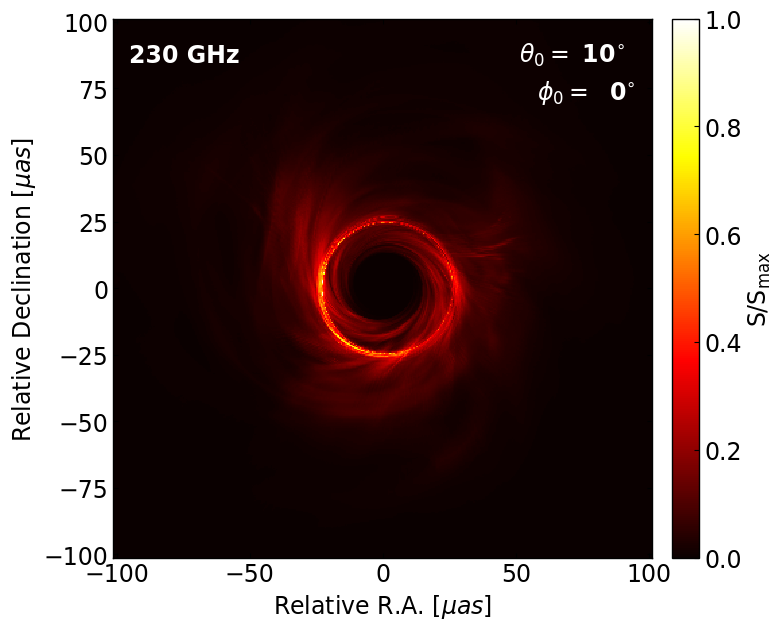

In [8]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc10/BHOSS_CODE
96, flux: 2.178122 at 9008.139053
97, flux: 2.206067 at 9017.844868
98, flux: 2.188228 at 9027.551100
99, flux: 2.170067 at 9038.646851
100, flux: 2.162174 at 9048.356431
101, flux: 2.135188 at 9058.061637
102, flux: 2.105788 at 9067.764826
103, flux: 2.087025 at 9077.464542
104, flux: 2.123250 at 9088.552963
105, flux: 2.069971 at 9098.254801
106, flux: 2.037346 at 9107.957635
107, flux: 2.049667 at 9117.659184
108, flux: 2.017702 at 9127.363548
109, flux: 1.997376 at 9138.452062
110, flux: 1.989369 at 9148.158890
111, flux: 1.958960 at 9157.868704
112, flux: 1.913505 at 9167.579583
113, flux: 1.878108 at 9178.672003
114, flux: 1.892769 at 9188.377169
115, flux: 1.954342 at 9198.079088
116, flux: 2.028668 at 9207.781556
117, flux: 2.024022 at 9217.482565
118, flux: 1.998160 at 9228.573654
119, flux: 2.014129 at 9238.281441
120, flux: 2.036312 at 9247.990304
121, flux: 2.021973 at 9257.698128
122, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.000898 Jy, the density scale = 1.720000e-18


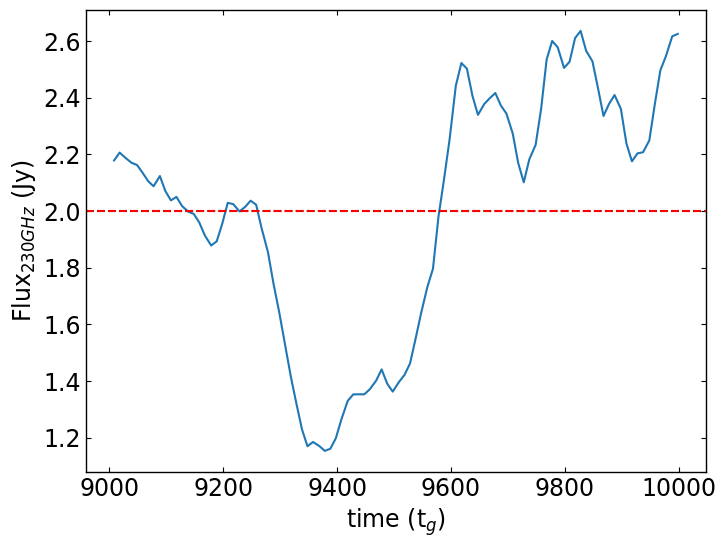

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.178122 Jy at 9008.139053
97:: 2.206067 Jy at 9017.844868
98:: 2.188228 Jy at 9027.551100
99:: 2.170067 Jy at 9038.646851
100:: 2.162174 Jy at 9048.356431
101:: 2.135188 Jy at 9058.061637
102:: 2.105788 Jy at 9067.764826
103:: 2.087025 Jy at 9077.464542
104:: 2.123250 Jy at 9088.552963
105:: 2.069971 Jy at 9098.254801
106:: 2.037346 Jy at 9107.957635
107:: 2.049667 Jy at 9117.659184
108:: 2.017702 Jy at 9127.363548
109:: 1.997376 Jy at 9138.452062
110:: 1.989369 Jy at 9148.158890
111:: 1.958960 Jy at 9157.868704
112:: 1.913505 Jy at 9167.579583
113:: 1.878108 Jy at 9178.672003
114:: 1.892769 Jy at 9188.377169
115:: 1.954342 Jy at 9198.079088
116:: 2.028668 Jy at 9207.781556
117:: 2.024022 Jy at 9217.482565
118:: 1.998160 Jy at 9228.573654
119:: 2.014129 Jy at 9238.281441
120:: 2.036312 Jy at 9247.990304
121:: 2.021973 Jy at 9257.698128
122:: 1.938214 Jy at 9267.401850
123:: 1.854330 Jy at 9278.487308
124:: 1.743435 Jy at 9288.189770
125:: 1.646386 Jy at 9297.894634
126:: 1.538268

In [41]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc30/BHOSS_CODE
96, flux: 2.176307 at 9008.139053
97, flux: 2.203422 at 9017.844868
98, flux: 2.188248 at 9027.551100
99, flux: 2.161603 at 9038.646851
100, flux: 2.151492 at 9048.356431
101, flux: 2.123995 at 9058.061637
102, flux: 2.091662 at 9067.764826
103, flux: 2.069338 at 9077.464542
104, flux: 2.112280 at 9088.552963
105, flux: 2.064429 at 9098.254801
106, flux: 2.038124 at 9107.957635
107, flux: 2.057915 at 9117.659184
108, flux: 2.032989 at 9127.363548
109, flux: 2.021845 at 9138.452062
110, flux: 2.014874 at 9148.158890
111, flux: 1.964056 at 9157.868704
112, flux: 1.923030 at 9167.579583
113, flux: 1.907554 at 9178.672003
114, flux: 1.957950 at 9188.377169
115, flux: 1.976879 at 9198.079088
116, flux: 2.025634 at 9207.781556
117, flux: 2.009850 at 9217.482565
118, flux: 1.993252 at 9228.573654
119, flux: 2.008891 at 9238.281441
120, flux: 2.023462 at 9247.990304
121, flux: 2.015634 at 9257.698128
122, flux

In [42]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [43]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.916244 Jy, the density scale = 1.650000e-18


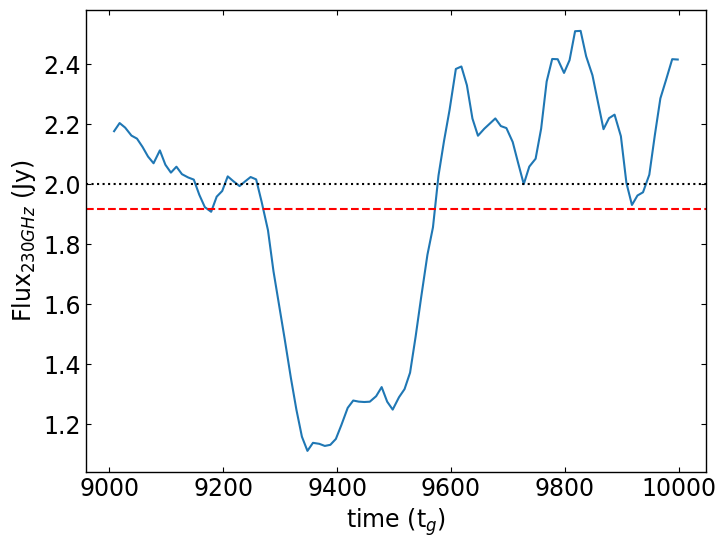

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [45]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.176307 Jy at 9008.139053
97:: 2.203422 Jy at 9017.844868
98:: 2.188248 Jy at 9027.551100
99:: 2.161603 Jy at 9038.646851
100:: 2.151492 Jy at 9048.356431
101:: 2.123995 Jy at 9058.061637
102:: 2.091662 Jy at 9067.764826
103:: 2.069338 Jy at 9077.464542
104:: 2.112280 Jy at 9088.552963
105:: 2.064429 Jy at 9098.254801
106:: 2.038124 Jy at 9107.957635
107:: 2.057915 Jy at 9117.659184
108:: 2.032989 Jy at 9127.363548
109:: 2.021845 Jy at 9138.452062
110:: 2.014874 Jy at 9148.158890
111:: 1.964056 Jy at 9157.868704
112:: 1.923030 Jy at 9167.579583
113:: 1.907554 Jy at 9178.672003
114:: 1.957950 Jy at 9188.377169
115:: 1.976879 Jy at 9198.079088
116:: 2.025634 Jy at 9207.781556
117:: 2.009850 Jy at 9217.482565
118:: 1.993252 Jy at 9228.573654
119:: 2.008891 Jy at 9238.281441
120:: 2.023462 Jy at 9247.990304
121:: 2.015634 Jy at 9257.698128
122:: 1.940286 Jy at 9267.401850
123:: 1.846143 Jy at 9278.487308
124:: 1.709021 Jy at 9288.189770
125:: 1.597674 Jy at 9297.894634
126:: 1.486222

In [46]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc50/BHOSS_CODE
96, flux: 2.368337 at 9008.139053
97, flux: 2.373771 at 9017.844868
98, flux: 2.340135 at 9027.551100
99, flux: 2.300287 at 9038.646851
100, flux: 2.291687 at 9048.356431
101, flux: 2.268279 at 9058.061637
102, flux: 2.241839 at 9067.764826
103, flux: 2.229945 at 9077.464542
104, flux: 2.312250 at 9088.552963
105, flux: 2.291730 at 9098.254801
106, flux: 2.274954 at 9107.957635
107, flux: 2.293393 at 9117.659184
108, flux: 2.280421 at 9127.363548
109, flux: 2.272179 at 9138.452062
110, flux: 2.248356 at 9148.158890
111, flux: 2.155061 at 9157.868704
112, flux: 2.123433 at 9167.579583
113, flux: 2.150186 at 9178.672003
114, flux: 2.177441 at 9188.377169
115, flux: 2.135368 at 9198.079088
116, flux: 2.163100 at 9207.781556
117, flux: 2.150374 at 9217.482565
118, flux: 2.144306 at 9228.573654
119, flux: 2.174807 at 9238.281441
120, flux: 2.204990 at 9247.990304
121, flux: 2.221087 at 9257.698128
122, flux

In [47]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [48]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.009748 Jy, the density scale = 1.640000e-18


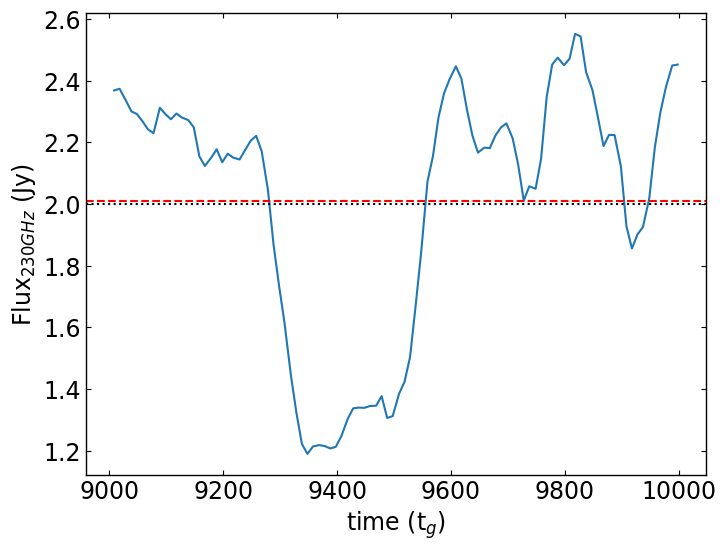

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [50]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.368337 Jy at 9008.139053
97:: 2.373771 Jy at 9017.844868
98:: 2.340135 Jy at 9027.551100
99:: 2.300287 Jy at 9038.646851
100:: 2.291687 Jy at 9048.356431
101:: 2.268279 Jy at 9058.061637
102:: 2.241839 Jy at 9067.764826
103:: 2.229945 Jy at 9077.464542
104:: 2.312250 Jy at 9088.552963
105:: 2.291730 Jy at 9098.254801
106:: 2.274954 Jy at 9107.957635
107:: 2.293393 Jy at 9117.659184
108:: 2.280421 Jy at 9127.363548
109:: 2.272179 Jy at 9138.452062
110:: 2.248356 Jy at 9148.158890
111:: 2.155061 Jy at 9157.868704
112:: 2.123433 Jy at 9167.579583
113:: 2.150186 Jy at 9178.672003
114:: 2.177441 Jy at 9188.377169
115:: 2.135368 Jy at 9198.079088
116:: 2.163100 Jy at 9207.781556
117:: 2.150374 Jy at 9217.482565
118:: 2.144306 Jy at 9228.573654
119:: 2.174807 Jy at 9238.281441
120:: 2.204990 Jy at 9247.990304
121:: 2.221087 Jy at 9257.698128
122:: 2.171626 Jy at 9267.401850
123:: 2.044890 Jy at 9278.487308
124:: 1.869658 Jy at 9288.189770
125:: 1.735714 Jy at 9297.894634
126:: 1.613271

In [51]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc70/BHOSS_CODE
96, flux: 2.425588 at 9008.139053
97, flux: 2.397867 at 9017.844868
98, flux: 2.333341 at 9027.551100
99, flux: 2.291238 at 9038.646851
100, flux: 2.290802 at 9048.356431
101, flux: 2.257794 at 9058.061637
102, flux: 2.249071 at 9067.764826
103, flux: 2.261875 at 9077.464542
104, flux: 2.396812 at 9088.552963
105, flux: 2.398585 at 9098.254801
106, flux: 2.403507 at 9107.957635
107, flux: 2.425950 at 9117.659184
108, flux: 2.395731 at 9127.363548
109, flux: 2.387413 at 9138.452062
110, flux: 2.330845 at 9148.158890
111, flux: 2.273299 at 9157.868704
112, flux: 2.208533 at 9167.579583
113, flux: 2.190891 at 9178.672003
114, flux: 2.215676 at 9188.377169
115, flux: 2.182950 at 9198.079088
116, flux: 2.234317 at 9207.781556
117, flux: 2.244758 at 9217.482565
118, flux: 2.324178 at 9228.573654
119, flux: 2.351249 at 9238.281441
120, flux: 2.388340 at 9247.990304
121, flux: 2.472531 at 9257.698128
122, flux

In [52]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [53]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.015172 Jy, the density scale = 1.580000e-18


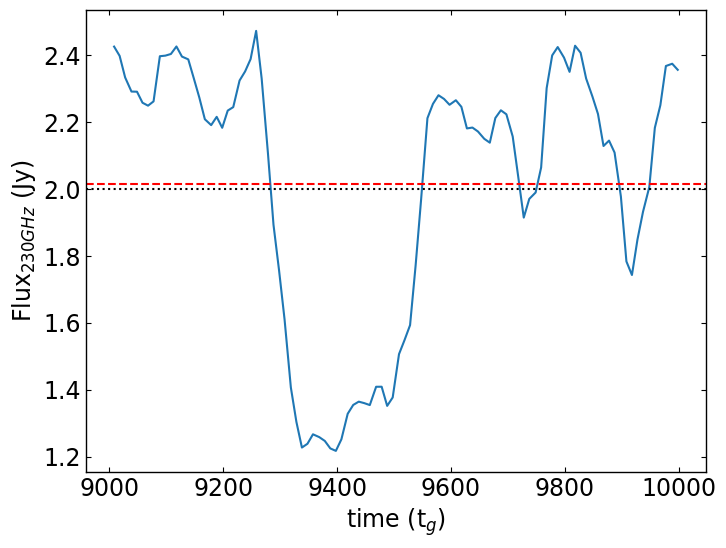

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [55]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.425588 Jy at 9008.139053
97:: 2.397867 Jy at 9017.844868
98:: 2.333341 Jy at 9027.551100
99:: 2.291238 Jy at 9038.646851
100:: 2.290802 Jy at 9048.356431
101:: 2.257794 Jy at 9058.061637
102:: 2.249071 Jy at 9067.764826
103:: 2.261875 Jy at 9077.464542
104:: 2.396812 Jy at 9088.552963
105:: 2.398585 Jy at 9098.254801
106:: 2.403507 Jy at 9107.957635
107:: 2.425950 Jy at 9117.659184
108:: 2.395731 Jy at 9127.363548
109:: 2.387413 Jy at 9138.452062
110:: 2.330845 Jy at 9148.158890
111:: 2.273299 Jy at 9157.868704
112:: 2.208533 Jy at 9167.579583
113:: 2.190891 Jy at 9178.672003
114:: 2.215676 Jy at 9188.377169
115:: 2.182950 Jy at 9198.079088
116:: 2.234317 Jy at 9207.781556
117:: 2.244758 Jy at 9217.482565
118:: 2.324178 Jy at 9228.573654
119:: 2.351249 Jy at 9238.281441
120:: 2.388340 Jy at 9247.990304
121:: 2.472531 Jy at 9257.698128
122:: 2.330194 Jy at 9267.401850
123:: 2.105822 Jy at 9278.487308
124:: 1.893152 Jy at 9288.189770
125:: 1.757913 Jy at 9297.894634
126:: 1.610853

In [56]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc90/BHOSS_CODE
96, flux: 2.543683 at 9008.139053
97, flux: 2.460633 at 9017.844868
98, flux: 2.386264 at 9027.551100
99, flux: 2.327741 at 9038.646851
100, flux: 2.301486 at 9048.356431
101, flux: 2.222726 at 9058.061637
102, flux: 2.204112 at 9067.764826
103, flux: 2.216997 at 9077.464542
104, flux: 2.341711 at 9088.552963
105, flux: 2.347363 at 9098.254801
106, flux: 2.395227 at 9107.957635
107, flux: 2.447607 at 9117.659184
108, flux: 2.440373 at 9127.363548
109, flux: 2.428139 at 9138.452062
110, flux: 2.358160 at 9148.158890
111, flux: 2.318885 at 9157.868704
112, flux: 2.234819 at 9167.579583
113, flux: 2.278043 at 9178.672003
114, flux: 2.249894 at 9188.377169
115, flux: 2.271997 at 9198.079088
116, flux: 2.367172 at 9207.781556
117, flux: 2.354507 at 9217.482565
118, flux: 2.338155 at 9228.573654
119, flux: 2.376532 at 9238.281441
120, flux: 2.410393 at 9247.990304
121, flux: 2.439319 at 9257.698128
122, flux

In [57]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [58]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.028139 Jy, the density scale = 1.560000e-18


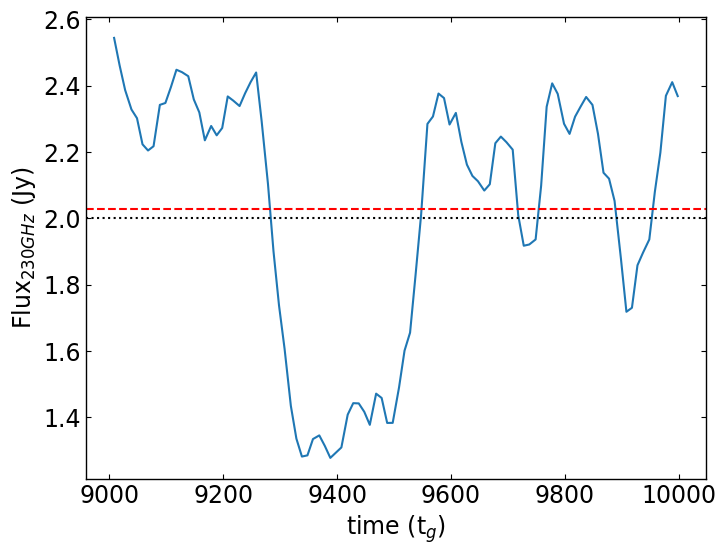

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [60]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.543683 Jy at 9008.139053
97:: 2.460633 Jy at 9017.844868
98:: 2.386264 Jy at 9027.551100
99:: 2.327741 Jy at 9038.646851
100:: 2.301486 Jy at 9048.356431
101:: 2.222726 Jy at 9058.061637
102:: 2.204112 Jy at 9067.764826
103:: 2.216997 Jy at 9077.464542
104:: 2.341711 Jy at 9088.552963
105:: 2.347363 Jy at 9098.254801
106:: 2.395227 Jy at 9107.957635
107:: 2.447607 Jy at 9117.659184
108:: 2.440373 Jy at 9127.363548
109:: 2.428139 Jy at 9138.452062
110:: 2.358160 Jy at 9148.158890
111:: 2.318885 Jy at 9157.868704
112:: 2.234819 Jy at 9167.579583
113:: 2.278043 Jy at 9178.672003
114:: 2.249894 Jy at 9188.377169
115:: 2.271997 Jy at 9198.079088
116:: 2.367172 Jy at 9207.781556
117:: 2.354507 Jy at 9217.482565
118:: 2.338155 Jy at 9228.573654
119:: 2.376532 Jy at 9238.281441
120:: 2.410393 Jy at 9247.990304
121:: 2.439319 Jy at 9257.698128
122:: 2.292108 Jy at 9267.401850
123:: 2.103235 Jy at 9278.487308
124:: 1.900202 Jy at 9288.189770
125:: 1.736783 Jy at 9297.894634
126:: 1.606987